In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Context

In [3]:
train_data_fielpath = "train.csv"
train_data = pd.read_csv(train_data_fielpath, index_col='PassengerId')

# Data quality assessment

In [4]:
# The first five rows of data
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [5]:
#the last five rows of data
train_data.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


In [6]:
#some columns do not have enough values: age, ticket, fare, cabin, embarked
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [7]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [8]:
# filling Age with mean age 
# train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) 
# filling Age with mean age due to class
# train_data[train_data['Pclass'] == 1]['Age'] = train_data[train_data['Pclass'] == 1]['Age'].fillna(train_data[train_data['Pclass'] == 1]['Age'].mean()) 
# train_data[train_data['Pclass'] == 2]['Age'] = train_data[train_data['Pclass'] == 1]['Age'].fillna(train_data[train_data['Pclass'] == 1]['Age'].mean())
# train_data[train_data['Pclass'] == 3]['Age'] = train_data[train_data['Pclass'] == 1]['Age'].fillna(train_data[train_data['Pclass'] == 1]['Age'].mean())

In [9]:
# represent male and female as numbers 
#train_data['Sex'].replace(['male','female'], [0, 1], inplace=True)

In [10]:
# add family size column 
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp'] + 1
# introduce idea of being alone
train_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1

In [11]:
# fare_map = train_data[['Fare', 'Pclass']].dropna().groupby('Pclass').median().to_dict()
# fare_map

# Data exploration

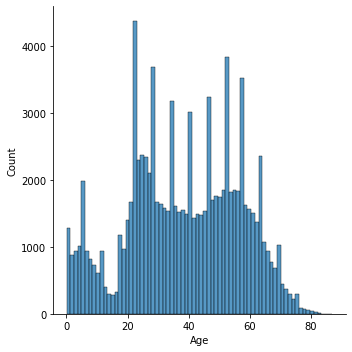

In [13]:
# 0 age
sns.displot(x='Age', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

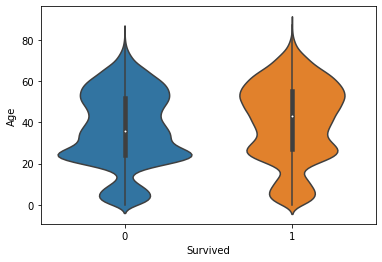

In [14]:
# 1 age and survival
sns.violinplot(x = 'Survived', y='Age', data=train_data)

Survived,0,1
Sex,,
female,12660,31226
male,44566,11548


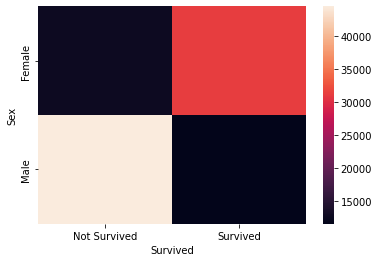

In [15]:
# 2 sex and survival
sns.heatmap(data = train_data.groupby(['Sex','Survived']).size().unstack(), xticklabels = ['Not Survived','Survived'], yticklabels=['Female','Male'])
train_data.groupby(['Sex','Survived']).size().unstack()

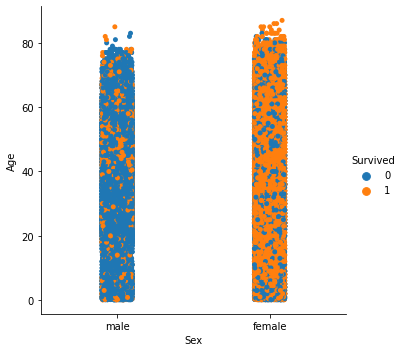

In [16]:
# 3 sex, age, survival
sns.catplot(x="Sex", y="Age", hue="Survived", data=train_data)

Survived,0,1
IsAlone,,
0,20386,17761
1,36840,25013


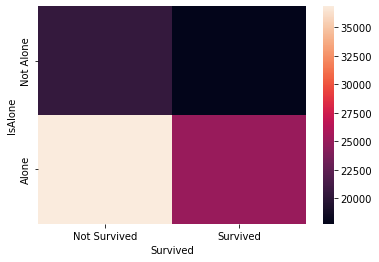

In [17]:
# 4 loneliness and survival
sns.heatmap(data = train_data.groupby(['IsAlone','Survived']).size().unstack(), xticklabels = ['Not Survived','Survived'], yticklabels=['Not Alone','Alone'])
train_data.groupby(['IsAlone','Survived']).size().unstack()

Sex,female,male
IsAlone,,
0,19389,18758
1,24497,37356


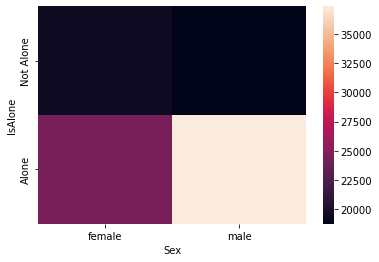

In [18]:
# 5 loneliness and sex
sns.heatmap(data = train_data.groupby(['IsAlone','Sex']).size().unstack(), yticklabels=['Not Alone','Alone'])
train_data.groupby(['IsAlone','Sex']).size().unstack()

Survived      0             1      
Sex      female   male female  male
IsAlone                            
0          6376  14010  13013  4748
1          6284  30556  18213  6800

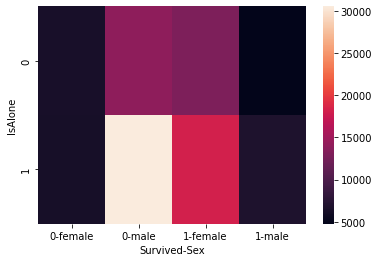

In [19]:
# 6 loneliness, sex and survival
sns.heatmap(data = train_data.groupby(['IsAlone',"Sex",'Survived']).size().unstack().unstack())
train_data.groupby(['IsAlone','Sex','Survived']).size().unstack().unstack()

<AxesSubplot:xlabel='Survived', ylabel='FamilySize'>

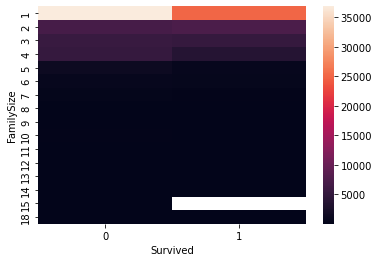

In [20]:
# 7 family size and survival
sns.heatmap(data = train_data.groupby(['FamilySize','Survived']).size().unstack())

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

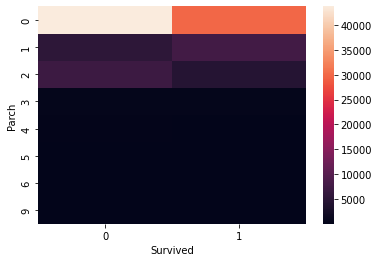

In [21]:
# 8 parch and survival
sns.heatmap(data = train_data.groupby(['Parch','Survived']).size().unstack())

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

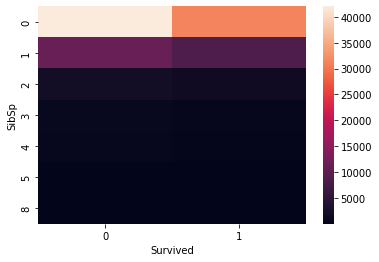

In [22]:
# 9  SibSp and survival
sns.heatmap(data = train_data.groupby(['SibSp','Survived']).size().unstack())

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

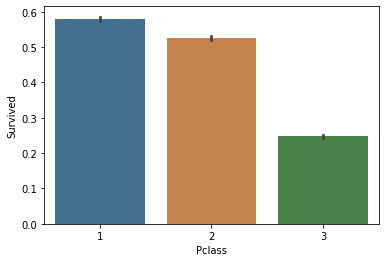

In [23]:
# 10 class and survival
sns.barplot(x="Pclass", y="Survived", data = train_data, saturation=.5)

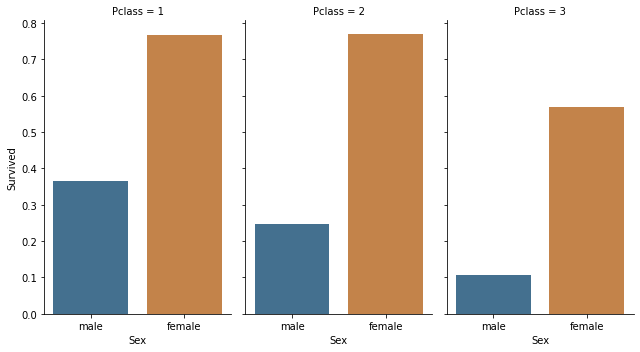

In [24]:
# 11 class, sex and survival 
sns.catplot(x="Sex", y="Survived", col="Pclass", data = train_data, saturation=.5, kind="bar", ci=None, aspect= .6)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

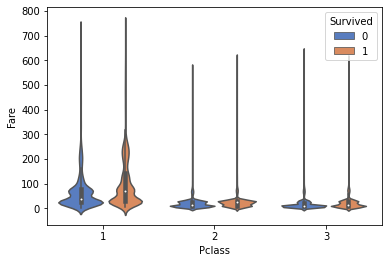

In [25]:
# 12 Fare, Class and Survival
sns.violinplot(x="Pclass", y="Fare", hue="Survived",data=train_data, palette="muted")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

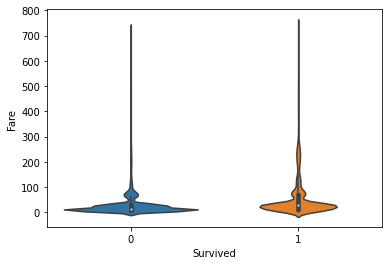

In [26]:
# 13 Fare and Survival
sns.violinplot(x = 'Survived', y='Fare', data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

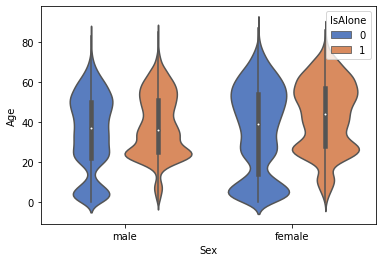

In [27]:
# 14 sex age loneliness
sns.violinplot(x="Sex", y="Age", hue="IsAlone",data=train_data, palette="muted")

# Summary

In [ ]:
# Some columns do not have enough values: age, ticket, fare, cabin, embarked.
# Family Size and IsAlone columns are added to show how religion affects survival.
# I did not use the "fillna" function to show the exact distribution.
# Most of the passengers are adults.
# Due to the first graph, passengers aged between 20 and 30 years are most likely to die.
# Due to the second graph, Males are more likely to die.
# Due to the third graph, Males aged between 40 and 50 years are more likely to survive, whereas females with all age variants are more likely to survive.
# Due to the fourth graph, lonely people are most likely to die.
# Due to the fifth graph, most males are more likely to be lonely.
# Due to the sixth graph, lonely males are most likely to die, but lonely females are most likely to survive. 
# According to the 7, 8, and 9 graphs more relation you have, the more likely you can survive.
# Due to the tenth graph, first and second-class passengers are most likely to survive.
# Due to the eleventh graph, the lower the class(1st->3rd), the more likely man will die.
# Due to the twelfth and thirteenth graphs, there is no clear relation between high fares and survival rate. Some of whom survived had on average 300 or fewer fares.
# All in all, a man who is lonely and aged between 20-30 are more likely to die. 
# Limitations - lack of understanding of how missed data affect end results.
# Suggestion - look through the relation between loneliness and age and sex. 
